In [2]:
import pandas as pd

In [32]:
tmp = pd.read_csv('../ml-01/01_eda/train.csv')

In [ ]:
10 основных
100 - длинный хвост




In [21]:
tmp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
pd.get_dummies(tmp).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1


In [30]:
tmp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C
2,3,1,3,26.0,0,0,7.9250,S
3,4,1,1,35.0,1,0,53.1000,S
4,5,0,3,35.0,0,0,8.0500,S


In [ ]:
2класс в 2 раза больше чем 1
3класс в 3 раза больше чем 1
3 в 1.5 чем 2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider, Dropdown

<center><img src='https://lh3.googleusercontent.com/proxy/BO-0GUTlUieGs2piatJ23uihAZg6p8-ujVYnvNh7l26BEICGqK2zkBqRtpg6iqUIcPGxam_TyhgwJx9Dh9e6aLMy5ptz-tiJTtEbl3Wzhbdh2A' width=600></center>

*** 

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png' width=400></center>




In [36]:
from sklearn import datasets 
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


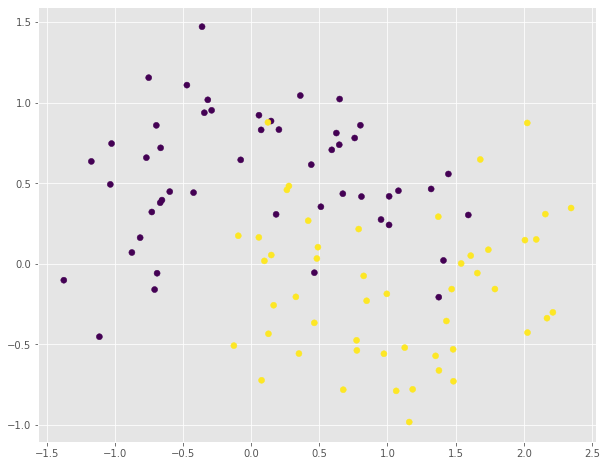

In [92]:
X, y = datasets.make_moons(noise=0.3, random_state=123)
plt.scatter(X[:,0], X[:,1], c=y)

In [93]:
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

grid_X = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])

print(grid_X.shape)

(10000, 2)


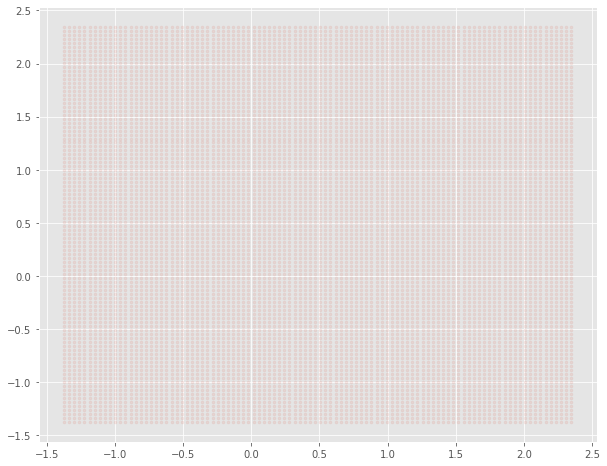

In [94]:
plt.scatter(grid_X[:, 0], grid_X[:, 1], alpha=0.1, marker='.')
# xlim(0, 0.1)
# ylim(0, 0.1)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

In [97]:
X[:,1] = X[:,1] / 3

In [98]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [99]:
Y = knn.predict_proba(grid_X)[:,1]

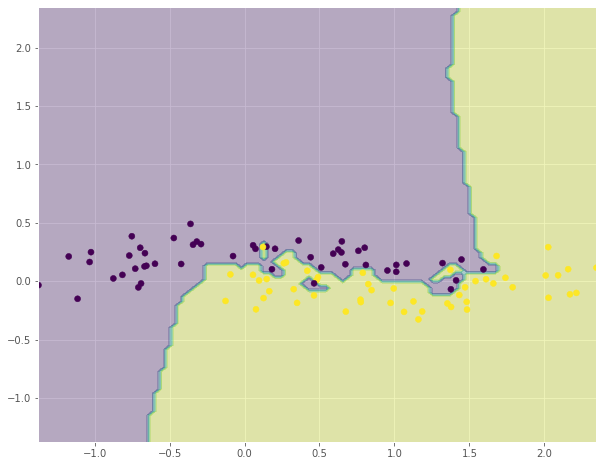

In [100]:
Y = Y.reshape(xx1.shape)

figsize(10, 8)
plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y)

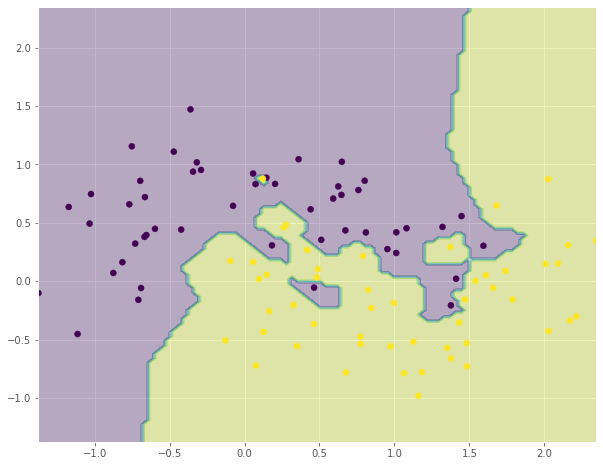

In [83]:
Y = Y.reshape(xx1.shape)

figsize(10, 8)
plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y)

In [78]:
def plot_knn_class_kernel(k=1, metric=None, weights=None):
        
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights)
    knn.fit(X, y)
    
    
    Y = knn.predict_proba(grid_X)[:,1]
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    
    plt.show()

In [79]:
figsize(10, 9)
fig = interact(plot_knn_class_kernel, 
               k=IntSlider(min=1, max=20, value=1),
               metric=Dropdown(
                    options=[
                        'euclidean', 
                        'manhattan', 
                        'chebyshev',
                        'canberra',
                        'braycurtis'
                    ],
                    value='euclidean',
                    description='metric',
                    disabled=False,
                ),
               weights=Dropdown(
                    options=[
                        'uniform', 
                        'distance'
                    ],
                    value='uniform',
                    description='weights',
                    disabled=False,
                ),
)

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), Dropdown(description='metric', optio…

In [102]:
# annoy, faiss
# ann

In [103]:
from sklearn.neighbors import KNeighborsRegressor

<center><img src='https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg'><center/>

## Схема построения решающего дерева
1. Находим наилучшее* разбиение
2. Разбиваем данные на 2 подмножества согласно разбиению из шага 1
3. Для каждого подмножества запускаем построение дерева

![ChessUrl](https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif "chess")

In [106]:
df_wine = pd.read_csv('winequality-red.csv', sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [109]:
df_wine['target'] = (df_wine['quality'] > 5).astype(int) 

In [111]:
df_wine['target'].value_counts()

1    855
0    744
Name: target, dtype: int64

In [144]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [149]:
df_wine['alcohol'] = (df_wine['alcohol'] / 100 + 20)**2

In [152]:
from ipywidgets import interact, IntSlider

def classification_demo(depth):
    
    dtc = DecisionTreeClassifier(max_depth=depth)

    dtc.fit(
        df_wine.drop(['target', 'quality'], axis=1),
        df_wine['target']
    )

    plot_tree(dtc, filled=True, feature_names=df_wine.drop(['target', 'quality'], axis=1).columns)

In [153]:
_ = interact(classification_demo, depth=IntSlider(min=1, max=6, value=1))

interactive(children=(IntSlider(value=1, description='depth', max=6, min=1), Output()), _dom_classes=('widget-…

In [139]:
dtc = DecisionTreeClassifier()

In [140]:
dtc.fit(
    df_wine.drop(['target', 'quality'], axis=1),
    df_wine['target']
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [141]:
pd.DataFrame(
    zip(
        dtc.feature_importances_, df_wine.drop(['target', 'quality'], axis=1).columns
    )
)

,0,1
0,0.057841,fixed acidity
1,0.082115,volatile acidity
2,0.070620,citric acid
3,0.054544,residual sugar
4,0.053308,chlorides
5,0.064058,free sulfur dioxide
6,0.127632,total sulfur dioxide
7,0.064256,density
8,0.056007,pH
9,0.116503,sulphates


In [ ]:
from sklearn.tree import DecisionTreeRegressor